In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import networkx as nx

# Load the dataset
dataset = pd.read_csv('Attrition_fnl.csv')


# Define selected columns for the graph (consider relationships)
selected_columns = ['MonthlyIncome', 'Age', 'StockOptionLevel', 'OverTime', 'TotalWorkingYears', 'MonthlyRate', 'YearsAtCompany', 'EmployeeNumber', 'DailyRate', 'DistanceFromHome',
                    'HourlyRate', 'YearsWithCurrManager', 'PercentSalaryHike', 'JobInvolvement', 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'JobSatisfaction',
                    'YearsInCurrentRole', 'RelationshipSatisfaction', 'JobLevel', 'YearsSinceLastPromotion', 'MaritalStatus', 'BusinessTravel', 'Attrition']

# Create a new DataFrame with selected columns
df_attrition = dataset[selected_columns]


# Separate features and target variable
X = df_attrition.drop(columns=['Attrition'])
y = df_attrition['Attrition']
y = np.array(list(map(lambda label: 1 if label == "Yes" else 0, df_attrition["Attrition"])))

# Create a graph
G = nx.Graph()

# Add nodes and node features to the graph
for idx, row in X.iterrows():
    employee_number = row['EmployeeNumber']
    G.add_node(employee_number, attr_dict = row.drop('EmployeeNumber').to_dict())

# Add edges based on 'BusinessTravel' and 'Gender'
for idx, row in X.iterrows():
    employee_number = row['EmployeeNumber']
    MonthlyIncome = row['MonthlyIncome']
    Age = row['Age']
    StockOptionLevel = row['StockOptionLevel']
    OverTime = row['OverTime']
    TotalWorkingYears = row['TotalWorkingYears']
    MonthlyRate = row['MonthlyRate']
    YearsAtCompany = row['YearsAtCompany']
    #MonthlyRate = row['EmployeeNumber']
    DailyRate = row['DailyRate']
    DistanceFromHome = row['DistanceFromHome']
    HourlyRate = row['HourlyRate']
    YearsWithCurrManager = row['YearsWithCurrManager']
    PercentSalaryHike = row['PercentSalaryHike']
    JobInvolvement = row['JobInvolvement']
    EnvironmentSatisfaction = row['EnvironmentSatisfaction']
    NumCompaniesWorked = row['NumCompaniesWorked']
    JobSatisfaction = row['JobSatisfaction']
    YearsInCurrentRole = row['YearsInCurrentRole']
    RelationshipSatisfaction = row['RelationshipSatisfaction']
    JobLevel = row['JobLevel']
    YearsSinceLastPromotion = row['YearsSinceLastPromotion']
    MaritalStatus = row['MaritalStatus']
    BusinessTravel = row['BusinessTravel']


    G.add_edge(employee_number, MonthlyIncome)
    G.add_edge(employee_number, Age)
    G.add_edge(employee_number, StockOptionLevel)
    G.add_edge(employee_number, OverTime)
    G.add_edge(employee_number, TotalWorkingYears)
    G.add_edge(employee_number, MonthlyRate)
    G.add_edge(employee_number, YearsAtCompany)
    G.add_edge(employee_number, DailyRate)
    G.add_edge(employee_number, DistanceFromHome)
    G.add_edge(employee_number, HourlyRate)
    G.add_edge(employee_number, YearsWithCurrManager)
    G.add_edge(employee_number, PercentSalaryHike)
    G.add_edge(employee_number, JobInvolvement)
    G.add_edge(employee_number, EnvironmentSatisfaction)
    G.add_edge(employee_number, NumCompaniesWorked)
    G.add_edge(employee_number, JobSatisfaction)
    G.add_edge(employee_number, YearsInCurrentRole)
    G.add_edge(employee_number, RelationshipSatisfaction)
    G.add_edge(employee_number, JobLevel)
    G.add_edge(employee_number, YearsSinceLastPromotion)
    G.add_edge(employee_number, MaritalStatus)
    G.add_edge(employee_number, BusinessTravel)

# Convert the graph to a node feature matrix
X_graph = nx.to_pandas_adjacency(G)
# Get the common indices between X_graph and X
common_indices = list(set(X_graph.index) & set(X.index))

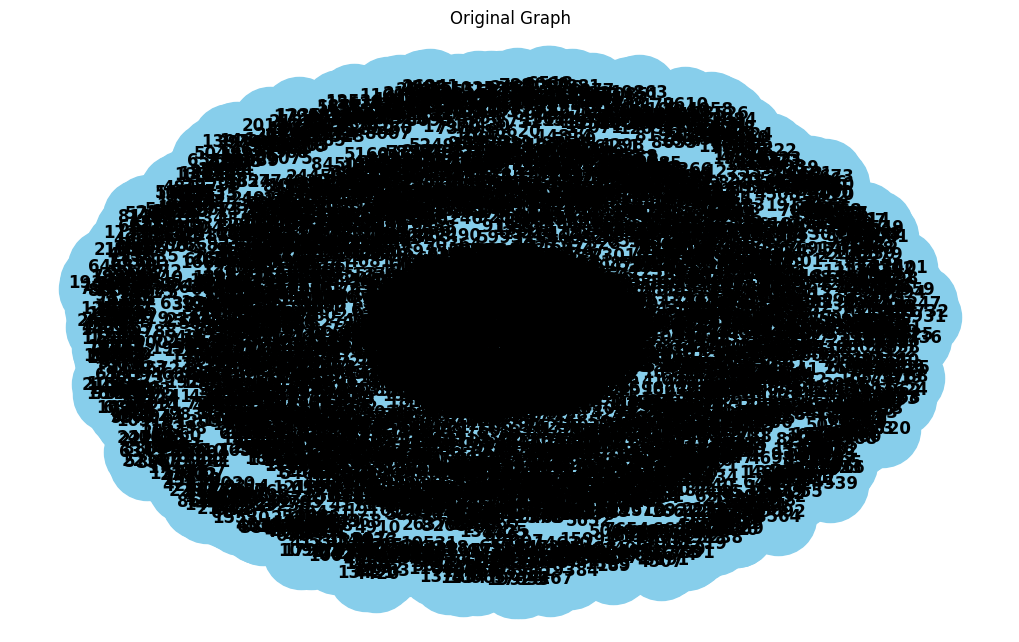

In [2]:
import matplotlib.pyplot as plt

# Plot the original graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Original Graph")
plt.show()

In [3]:
print("\nNode values in original graph:")
for node, data in G.nodes(data=True):
    print(node, data)

Streaming output truncated to the last 5000 lines.
944 {'attr_dict': {'MonthlyIncome': 7403, 'Age': 49, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 29, 'MonthlyRate': 22477, 'YearsAtCompany': 26, 'DailyRate': 527, 'DistanceFromHome': 8, 'HourlyRate': 51, 'YearsWithCurrManager': 7, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 1, 'NumCompaniesWorked': 4, 'JobSatisfaction': 2, 'YearsInCurrentRole': 9, 'RelationshipSatisfaction': 3, 'JobLevel': 3, 'YearsSinceLastPromotion': 1, 'MaritalStatus': 'Married', 'BusinessTravel': 'Travel_Rarely'}}
945 {'attr_dict': {'MonthlyIncome': 2259, 'Age': 48, 'StockOptionLevel': 2, 'OverTime': 'No', 'TotalWorkingYears': 13, 'MonthlyRate': 5543, 'YearsAtCompany': 0, 'DailyRate': 1469, 'DistanceFromHome': 20, 'HourlyRate': 51, 'YearsWithCurrManager': 0, 'PercentSalaryHike': 17, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 4, 'NumCompaniesWorked': 4, 'JobSatisfaction': 3, 'YearsInCurrentRole': 0, 'RelationshipSa

In [3]:
import copy

# Create a copy of the original graph
G_copy = copy.deepcopy(G)

first_3150_nodes = list(G_copy.nodes())[:3150]

# Remove all nodes except the first 3150 nodes from the copied graph
nodes_to_remove = set(G_copy.nodes()) - set(first_3150_nodes)
G_copy.remove_nodes_from(nodes_to_remove)

print("\nNode values in copied graph:")
for node, data in G_copy.nodes(data=True):
    print(node, data)


Node values in copied graph:
1 {'attr_dict': {'MonthlyIncome': 5993, 'Age': 41, 'StockOptionLevel': 0, 'OverTime': 'Yes', 'TotalWorkingYears': 8, 'MonthlyRate': 19479, 'YearsAtCompany': 6, 'DailyRate': 1102, 'DistanceFromHome': 1, 'HourlyRate': 94, 'YearsWithCurrManager': 5, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 2, 'NumCompaniesWorked': 8, 'JobSatisfaction': 4, 'YearsInCurrentRole': 4, 'RelationshipSatisfaction': 1, 'JobLevel': 2, 'YearsSinceLastPromotion': 0, 'MaritalStatus': 'Single', 'BusinessTravel': 'Travel_Rarely'}}
2 {'attr_dict': {'MonthlyIncome': 5130, 'Age': 49, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 10, 'MonthlyRate': 24907, 'YearsAtCompany': 10, 'DailyRate': 279, 'DistanceFromHome': 8, 'HourlyRate': 61, 'YearsWithCurrManager': 7, 'PercentSalaryHike': 23, 'JobInvolvement': 2, 'EnvironmentSatisfaction': 3, 'NumCompaniesWorked': 1, 'JobSatisfaction': 2, 'YearsInCurrentRole': 7, 'RelationshipSatisfaction': 4, 'JobLevel'

1383 {'attr_dict': {'MonthlyIncome': 6687, 'Age': 34, 'StockOptionLevel': 0, 'OverTime': 'No', 'TotalWorkingYears': 14, 'MonthlyRate': 6163, 'YearsAtCompany': 14, 'DailyRate': 404, 'DistanceFromHome': 2, 'HourlyRate': 98, 'YearsWithCurrManager': 11, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 3, 'NumCompaniesWorked': 1, 'JobSatisfaction': 4, 'YearsInCurrentRole': 11, 'RelationshipSatisfaction': 4, 'JobLevel': 2, 'YearsSinceLastPromotion': 4, 'MaritalStatus': 'Single', 'BusinessTravel': 'Travel_Rarely'}}
1387 {'attr_dict': {'MonthlyIncome': 4724, 'Age': 28, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 5, 'MonthlyRate': 24232, 'YearsAtCompany': 5, 'DailyRate': 736, 'DistanceFromHome': 26, 'HourlyRate': 48, 'YearsWithCurrManager': 4, 'PercentSalaryHike': 11, 'JobInvolvement': 2, 'EnvironmentSatisfaction': 3, 'NumCompaniesWorked': 1, 'JobSatisfaction': 1, 'YearsInCurrentRole': 3, 'RelationshipSatisfaction': 3, 'JobLevel': 2, 'YearsSinceLastProm

2333 {'attr_dict': {'MonthlyIncome': 2086, 'Age': 36, 'StockOptionLevel': 0, 'OverTime': 'No', 'TotalWorkingYears': 18, 'MonthlyRate': 19373, 'YearsAtCompany': 4, 'DailyRate': 1402, 'DistanceFromHome': 2, 'HourlyRate': 89, 'YearsWithCurrManager': 3, 'PercentSalaryHike': 21, 'JobInvolvement': 4, 'EnvironmentSatisfaction': 3, 'NumCompaniesWorked': 2, 'JobSatisfaction': 1, 'YearsInCurrentRole': 3, 'RelationshipSatisfaction': 3, 'JobLevel': 1, 'YearsSinceLastPromotion': 1, 'MaritalStatus': 'Single', 'BusinessTravel': 'Travel_Rarely'}}
2334 {'attr_dict': {'MonthlyIncome': 2180, 'Age': 36, 'StockOptionLevel': 0, 'OverTime': 'No', 'TotalWorkingYears': 6, 'MonthlyRate': 22955, 'YearsAtCompany': 3, 'DailyRate': 798, 'DistanceFromHome': 6, 'HourlyRate': 46, 'YearsWithCurrManager': 2, 'PercentSalaryHike': 18, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 4, 'NumCompaniesWorked': 6, 'JobSatisfaction': 4, 'YearsInCurrentRole': 2, 'RelationshipSatisfaction': 2, 'JobLevel': 1, 'YearsSinceLastPromot

3083 {'attr_dict': {'MonthlyIncome': 3838, 'Age': 41, 'StockOptionLevel': 1, 'OverTime': 'Yes', 'TotalWorkingYears': 10, 'MonthlyRate': 9100, 'YearsAtCompany': 10, 'DailyRate': 1181, 'DistanceFromHome': 17, 'HourlyRate': 96, 'YearsWithCurrManager': 0, 'PercentSalaryHike': 11, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 4, 'NumCompaniesWorked': 1, 'JobSatisfaction': 2, 'YearsInCurrentRole': 9, 'RelationshipSatisfaction': 1, 'JobLevel': 1, 'YearsSinceLastPromotion': 8, 'MaritalStatus': 'Divorced', 'BusinessTravel': 'Travel_Rarely'}}
3084 {'attr_dict': {'MonthlyIncome': 5768, 'Age': 34, 'StockOptionLevel': 1, 'OverTime': 'No', 'TotalWorkingYears': 8, 'MonthlyRate': 26493, 'YearsAtCompany': 5, 'DailyRate': 836, 'DistanceFromHome': 27, 'HourlyRate': 61, 'YearsWithCurrManager': 2, 'PercentSalaryHike': 17, 'JobInvolvement': 3, 'EnvironmentSatisfaction': 2, 'NumCompaniesWorked': 5, 'JobSatisfaction': 4, 'YearsInCurrentRole': 4, 'RelationshipSatisfaction': 2, 'JobLevel': 2, 'YearsSinceLastP

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.random_projection import SparseRandomProjection
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def generate_node_embeddings(graph, n_components=64):
    # Extract node features and convert them to arrays
    node_features = []
    for node, data in graph.nodes(data=True):
        # Extracting values from the 'attr_dict' attribute
        features = list(data['attr_dict'].values())
        node_features.append(features)

    # Convert node features to array
    node_features = np.array(node_features)

    # Identify categorical columns
    categorical_cols = [i for i, dtype in enumerate(node_features[0]) if isinstance(dtype, str)]

    # Apply one-hot encoding to categorical columns
    if categorical_cols:
        transformer = ColumnTransformer(
            transformers=[('cat', OneHotEncoder(), categorical_cols)],
            remainder='passthrough'
        )
        node_features = transformer.fit_transform(node_features)

    #print(node_features.shape)

    # Initialize Random Projection model
    rp_model = SparseRandomProjection(n_components=n_components)

    # Generate node embeddings
    node_embeddings = rp_model.fit_transform(node_features)
    return node_embeddings

# Generate node embeddings
node_embeddings = generate_node_embeddings(G_copy)
#print(node_embeddings)
# Print the shape of node embeddings
print(node_embeddings.shape)

(3150, 64)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
#labels = df_attrition['Attrition'].map({'No': 0, 'Yes': 1}).values
# Split the data into train and test sets
#labels.shape
from imblearn.over_sampling import SMOTE

# Check for class imbalance in y
if len(np.unique(y)) == 2 and np.bincount(y)[0] != np.bincount(y)[1]:
    smote = SMOTE(sampling_strategy='auto')
    node_embeddings, y = smote.fit_resample(node_embeddings, y)
X_train, X_test, y_train, y_test = train_test_split(node_embeddings, y, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'imblearn'

In [6]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

classifiers = {
        'LogisticReg': LogisticRegression(),
        'SVC': SVC(),
        'GBC': GradientBoostingClassifier(),
        'kNN': KNeighborsClassifier(),
        'RF' : RandomForestClassifier()
}
pred = []
scores = {}
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred = classifier.predict(X_test)

    # Store predictions
    pred.append(y_pred)

    # Calculate and store scores
    scores[name] = {
        'classification_report': classification_report(y_test, y_pred, zero_division=0),
        'auc_score': roc_auc_score(y_test, y_pred)
    }

    # Print results
    print(f'\n<------------- MODEL: {name} ----------->')
    print(f'Classification Report:\n{scores[name]["classification_report"]}')
    print(f'AUC Score: {scores[name]["auc_score"]}')
    print(f'<------------- END ----------->\n')


NameError: name 'X_train' is not defined

In [7]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred[0], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred[1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred[2], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred[3], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred[4], pos_label=1)


# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

NameError: name 'y_test' is not defined

In [8]:
# plot roc curves
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(fpr3, tpr3, linestyle='--',color='Red', label='GBC')
plt.plot(fpr4, tpr4, linestyle='--',color='Black', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='Violet', label='Random Forest')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

NameError: name 'fpr1' is not defined